<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/piercel_week3_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Pierce Lopez <br>
**Date Created**: August 21, 2020 <br>
**Last Updated**: August 21, 2020 <br> 
**Description**: Contains some applications of Week 3 lessons on various datasets.

# Prelude: Preliminary Notes

## Some preliminary notes about the Customs dataset columns: 

<br>

<ins>*Identification Variables*</ins>: <br>
**uid** - unique identification number for each import transaction <br>
* 2012-2013 format: yyyyqq nnnnnnnn (i.e. 2012q1 00000001): quarterly <br>
* 2014-2019 format: yyyymm nnnnnnnn (i.e. 201401 00000001): monthly

<ins>*Time Variables*</ins>: <br>
**ty** - year of import transaction <br>
**tq** - year and quarter of import transaction
* human readable format: yyyyqn (i.e 2012q1 - first quarter of 2012) <br>

**tm** - year and month of import transaction
* human readable format: yyyymn (i.e. 2014m10 - October 2012(?) 2014)
* NOTE: blank for 2012-2013 since data was recorded quarterly

<ins>*Entry Type Variables*</ins>: <br>
**entry** - act, documentation, and process of bringing imported goods into the customs territory
* C - consumption: domestic use; tax imposed
* W - customs bonded warehousing: kept and exempted from duties and taxes
* T - transshipment or transit: further shipped to another port/country
* C-Temp - consumption-temporary
* . - unspecified or missing entry: August 2014; September 2017 - December 2019
  * 2012-2013 (import entries assumed to be C)

<ins>*Product Variables*</ins>: <br>
**hscode** - 11-digit product classification of a good; marker of imposed tariffs
* i.e. 10 - cereals
  * 1006 - rice
  * 100610 - rice in the husk

**goodsdescription** - description of the imported goods

<ins>*Price Variables*</ins>: <br>
**p** - USD price per kg of import transaction.

<ins>*Quantity Variables*</ins>: <br>
**q** - mass of import transaction in kg

<ins>*Value Variables*</ins>: <br>
**m_fob** - USD free on board value estimate of the import transaction <br>
**m_cif** - USD cost, insurance, and freight value estimate of the import transaction <br>
**fx_usd** - weighted average exchange rate from foreign currency units (FCU) to USD for a given time period
* 2012-2013: quarterly
* 2014-2019: monthly

**dutiablevalueforeign** - dutiable import value 
* can be estimated by adding customsvalue, freight, and insurance

**exchangerate** - exchange rate from FCU to PHP <br>
**currency** - the denomination currency of the import transaction <br>
**dutiablevaluephp** - dutiable import value in PHP

<ins>*Duty and Tax Variables*</ins>: <br>
**dutypaid** - customs duties paid on the transaction in PHP <br>
**exciseadvalorem** - excise and/or ad valorem taxes paid on the transaction in PHP <br>
**arrastre** - amount in PHP owner has to pay for handling, receiving, and custody of their merchandise <br>
**wharfage** - port facility usage fee in PHP <br>
**vatbase** - value-added tax base in PHP
* can be estimated by adding dutiablevaluephp, dutypaid, exciseadvalorem, arrastre, wharfage, and other charges <br>

**vatpaid** - value-added tax paid on the transaction in PHP <br>
**othertax** - other taxes paid on the transaction in PHP <br>
**finesandpenalties** - fines and penalties paid on the transaction in PHP <br>
**dutiestaxes** - total duties and taxes paid on the transaction in PHP
* can be estimated by adding dutypaid, exciseadvalorem, vatpaid, finesandpenalties, and othertax

<ins>*Trade Agreement Variables*</ins>: <br>
**prefcode** - preferential trade agreement used for the transaction
* AFTA:	 ASEAN Free Trade
* ACFTA:	 ASEAN-China Free Trade Agreement
* JPEPA:	 Philippines-Japan Economic Partnership Agreement
* ANFTA:	 ASEAN-Australia-New Zealand Free Trade Agreement
* AKFTA:	 ASEAN-Korea Free Trade Agreement
* BOI:	 Board of Investments
* AFMA:	 (?) Agriculture and Fisheries Modernization Act (?)
* AIFTA:	 ASEAN-India Free Trade Agreement
* AJCEP:	 ASEAN-Japan Comprehensive Economic Partnership Agreement
* EFTA:	 Philippines-European Free Trade Association Free Trade Agreement
* AICO:	 ASEAN Industrial Cooperation Scheme
* APTA:	 (?) Asia Pacific Trade Agreement (?)
* AIJV:	 ASEAN Industrial Joint Venture

<ins>*Country Variables*</ins>: <br>
**countryorigin_iso3** - country of origin of the transaction <br>
**countryexport_iso3** - country of export of the transaction

<ins>*Port Variables*</ins>: <br>
**subport** - name of subport of entry <br>
**port** - name of major port of entry


## Recap Strategy of Plotting with Seaborn

1. Import modules.
2. Choose what type of plot you want to create.
  * Relational plots - relationship between two quantitative variables
    * Scatter plots
    * Line plots
  * Categorical plots - distribution of a quantitative variable over categories under a categorical variable.
    * Bar plots
    * Count plots
    * Box plots
    * Point plots
3. Add a third variable (optional).
  * Setting `hue` to distinguish, by color, different values (subgroups) of the third variable.
  * Setting `row`/`col` to create subplots for the different subgroups of the third variable.
4. Customize plots (optional but good to practice).
  * `sns.set_style()` to change the background
  * `sns.set_palette()` to change main element colors
  * `sns.set_context()` to change the plot scale
5. Add plot titles and axes labels.
  * Titles:
    * `FacetGrid` - `g.fig.suptitle("Title")`
    * `AxesSubplot` - `g.set_title("Title")`
  * Axes Labels - `g.set(xlabel = "X Label", ylabel = "Y Label")`
6. Add final touches (optional, but can be needed).
  * Rotating x-tick labels - `plt.xticks(rotation = 90)`

# Introduction to Data Visualization with Seaborn

In [1]:
# mount drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# change working directory
%cd drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

/content/drive/.shortcut-targets-by-id/1pfxnf06OodnUo3H4NgkxVN6pA2FI9hh_/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv


In [292]:
# import necessary modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlretrieve
import requests
import glob
import gc

*I will try to replicate some plots from the previous week using Seaborn.*

In [5]:
# load the 2016 dataset
dat2016 = pd.read_csv("boc_lite_2016.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


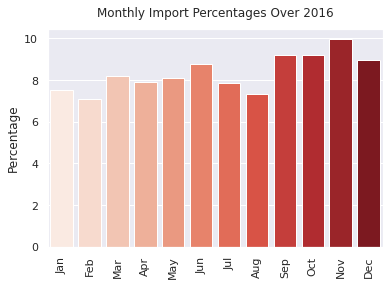

In [50]:
# imports per month (percentages over a year)
tm = pd.DataFrame(dat2016["tm"].value_counts(normalize = True)) * 100

# changing indices
new_index = []
for index in tm.index.str.replace("2016m",""):
  new_index.append(int(index))
tm["month"] = new_index

# sorting indices
tm_sorted = tm.reset_index(drop = True).set_index("month").sort_index().reset_index()

# plot monthly imports
sns.set_style("darkgrid")
sns.set_palette("Reds", 12)
sns.set_context("notebook")
g = sns.barplot("month",
                "tm",
                data = tm_sorted)

g.set_title("Monthly Import Percentages Over 2016",
            y = 1.03)
g.set(xlabel = "",
      ylabel = "Percentage")
g.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
                  rotation = 90)
plt.show()

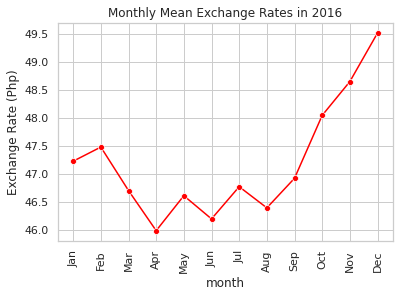

In [78]:
# monthly mean exchange rates in 2016
excrate_month_mean = dat2016.groupby("tm")[["exchangerate"]].mean()

# changing indices
new_index = []
for index in excrate_month_mean.index.str.replace("2016m",""):
  new_index.append(int(index))
excrate_month_mean["month"] = new_index

# sorting indices
excrate_month_mean_sorted = excrate_month_mean.reset_index(drop = True).set_index("month").sort_index().reset_index()

# plot monthly imports
sns.set_style("whitegrid")
sns.set_context("notebook")
g = sns.lineplot("month",
                 "exchangerate",
                 data = excrate_month_mean_sorted,
                 color = "red",
                 marker = "o")

g.set_title("Monthly Mean Exchange Rates in 2016")
g.set(ylabel = "Exchange Rate (Php)")
g.set_xticks(range(1,len(excrate_month_mean_sorted)+1))
g.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 
                   rotation = 90)
plt.show()

In [87]:
# concatenate multiple datasets (in batches)
df = []
for filename in glob.glob("boc_lite_201?.csv")[2:4]:
  dat = pd.read_csv(filename, encoding = "ISO-8859-1")
  df.append(dat[["ty", "tq", "tm", "exchangerate", "countryorigin_iso3"]])
  gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
for filename in glob.glob("boc_lite_201?.csv")[4:6]:
  dat = pd.read_csv(filename, encoding = "ISO-8859-1")
  df.append(dat[["ty", "tq", "tm", "exchangerate", "countryorigin_iso3"]])
  gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
for filename in glob.glob("boc_lite_201?.csv")[6:8]:
  dat = pd.read_csv(filename, encoding = "ISO-8859-1")
  df.append(dat[["ty", "tq", "tm", "exchangerate", "countryorigin_iso3"]])
  gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
# concatenate appended batches into a DataFrame
df = pd.concat(df)

In [116]:
# check first and last rows
print(df.head())
print(df.tail())

     ty      tq      tm  exchangerate countryorigin_iso3
0  2014  2014q1  2014m1        44.343                AUS
1  2014  2014q1  2014m1        44.414                CHN
2  2014  2014q1  2014m1        45.271                CHN
3  2014  2014q1  2014m1        44.713                CHN
4  2014  2014q1  2014m1        45.271                NZL
           ty      tq       tm  exchangerate countryorigin_iso3
3794758  2019  2019q4  2019m12     50.630001                USA
3794759  2019  2019q4  2019m12     50.859001                IDN
3794760  2019  2019q4  2019m12     50.859001                AUS
3794761  2019  2019q4  2019m12     50.859001                CHN
3794762  2019  2019q4  2019m12     50.733002                CHN


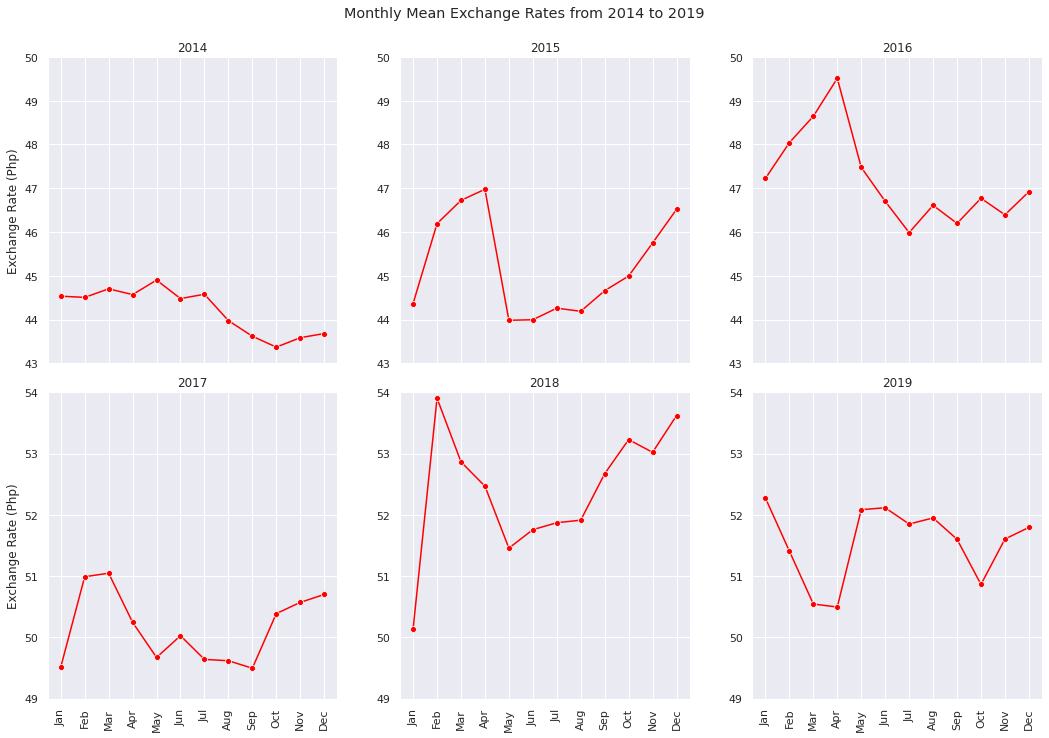

In [264]:
# monthly mean exchange rates from 2014 to 2019
df_excrate_mean_sorted = df.groupby(["ty", 
                                     "tq", 
                                     "tm"])[["exchangerate"]].mean().reset_index()
sns.set_style("darkgrid")
sns.set_context("notebook")
g = sns.relplot("tm", 
                "exchangerate",
                data = df_excrate_mean_sorted,
                kind = "line",
                col = "ty",
                col_wrap = 3,
                color = "red",
                marker = "o",
                facet_kws = {'sharey':False, 
                            'sharex':True})
g.fig.suptitle("Monthly Mean Exchange Rates from 2014 to 2019", 
               y = 1.03)
g.set_xlabels("")
g.set_ylabels("Exchange Rate (Php)")
g.set(xticks=(range(0,12)))
g.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
                   rotation = 90)
for i in range(6):
  g.axes[i].set_title("201"+str(i+4))
  if i < 3:
    g.axes[i].set_ylim((43, 50))
  else:
    g.axes[i].set_ylim((49, 54))
plt.show()

# Introduction to Importing Data in Python

The GapMinder dataset also has a lot of numbers to crunch through! :)

In [194]:
# using the gapminder dataset
url = "https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder_data.csv"

# write contents of the url to a file
urlretrieve(url, "gapminder.csv")

# read file into a DataFrame
gapminder = pd.read_csv("gapminder.csv")
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


    Continent         Country  ...           pop  Population (in Millions)
0      Africa         Algeria  ...  1.987541e+07                  8.425333
1      Africa          Angola  ...  7.309390e+06                  9.240934
2      Africa           Benin  ...  4.017497e+06                 10.267083
3      Africa        Botswana  ...  9.711862e+05                 11.537966
4      Africa    Burkina Faso  ...  7.548677e+06                 13.079460
..        ...             ...  ...           ...                       ...
137    Europe     Switzerland  ...  6.384293e+06                  5.079716
138    Europe          Turkey  ...  4.590901e+07                  5.642224
139    Europe  United Kingdom  ...  5.608780e+07                  6.156369
140   Oceania       Australia  ...  1.464931e+07                  6.893451
141   Oceania     New Zealand  ...  3.100032e+06                  7.693188

[142 rows x 6 columns]


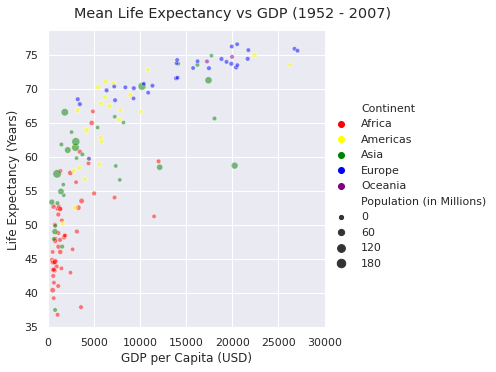

In [308]:
# mean gdp per capita vs mean life exp (1952-2007) for all countries
gapminder_temp = gapminder.groupby(["continent", "country"])[["gdpPercap", "lifeExp", "pop"]].mean().reset_index()
gapminder_temp["pop_per_mil"] = gapminder["pop"] / 1000000
gapminder_temp.columns = ["Continent", "Country", "gdpPercap", "lifeExp", "pop", "Population (in Millions)"]
print(gapminder_temp)

sns.set_style("darkgrid")
sns.set_palette(["Red", "Yellow", "Green", "Blue", "Purple"])
sns.set_context("notebook")
g = sns.relplot("gdpPercap",
                "lifeExp", 
                data = gapminder_temp,
                kind = "scatter",
                hue = "Continent",
                size = "Population (in Millions)",
                alpha = 0.5)

g.fig.suptitle("Mean Life Expectancy vs GDP (1952 - 2007)",
               y = 1.03)
g.set(xlim = (0, 30000),
      xlabel = "GDP per Capita (USD)",
      ylabel = "Life Expectancy (Years)")
plt.show()

          country  year         pop continent  lifeExp    gdpPercap
60      Australia  1952   8691212.0   Oceania   69.120  10039.59564
61      Australia  1957   9712569.0   Oceania   70.330  10949.64959
62      Australia  1962  10794968.0   Oceania   70.930  12217.22686
63      Australia  1967  11872264.0   Oceania   71.100  14526.12465
64      Australia  1972  13177000.0   Oceania   71.930  16788.62948
65      Australia  1977  14074100.0   Oceania   73.490  18334.19751
66      Australia  1982  15184200.0   Oceania   74.740  19477.00928
67      Australia  1987  16257249.0   Oceania   76.320  21888.88903
68      Australia  1992  17481977.0   Oceania   77.560  23424.76683
69      Australia  1997  18565243.0   Oceania   78.830  26997.93657
70      Australia  2002  19546792.0   Oceania   80.370  30687.75473
71      Australia  2007  20434176.0   Oceania   81.235  34435.36744
1092  New Zealand  1952   1994794.0   Oceania   69.390  10556.57566
1093  New Zealand  1957   2229407.0   Oceania   

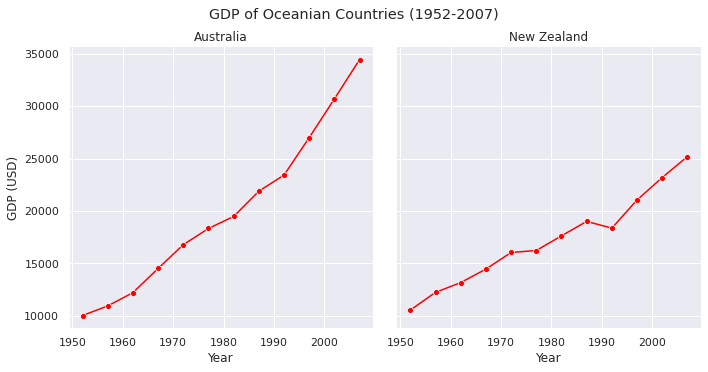

In [306]:
# gdp over time of Oceanian countries
gapminder_oceania = gapminder[gapminder["continent"] == "Oceania"]
print(gapminder_oceania)

g = sns.relplot("year", 
                "gdpPercap", 
                data = gapminder_oceania,
                kind = "line",
                col = "country",
                col_wrap = 2,
                marker = "o",
                markers = True)

g.fig.suptitle("GDP of Oceanian Countries (1952-2007)",
               y = 1.03)
g.set_xlabels("Year")
g.set_ylabels("GDP (USD)")
for i in range(len(gapminder_oceania["country"].unique())):
  g.axes[i].set_title(gapminder_oceania["country"].unique()[i])

plt.show()

# Intermediate Importing Data in Python

I tried to search for one of favorite movies through an API. (**Note:** An API key is needed in order to use the OMDb API, which can be available when registering.)

In [339]:
# set url
url = "http://www.omdbapi.com/?t=Good+Will+Hunting&apikey=69d80ff7"

# package and send request plus catch response
r = requests.get(url)
 
# return a dictionary (JSON data)
json_data = r.json()
 
# display key-value pairs
for key, value in json_data.items():
  print(str(key) + ": " + str(value))

Title: Good Will Hunting
Year: 1997
Rated: R
Released: 09 Jan 1998
Runtime: 126 min
Genre: Drama, Romance
Director: Gus Van Sant
Writer: Matt Damon, Ben Affleck
Actors: Matt Damon, Ben Affleck, Stellan Skarsgård, John Mighton
Plot: Will Hunting, a janitor at M.I.T., has a gift for mathematics, but needs help from a psychologist to find direction in his life.
Language: English
Country: USA
Awards: Won 2 Oscars. Another 22 wins & 60 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BOTI0MzcxMTYtZDVkMy00NjY1LTgyMTYtZmUxN2M3NmQ2NWJhXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.3/10'}, {'Source': 'Rotten Tomatoes', 'Value': '97%'}, {'Source': 'Metacritic', 'Value': '70/100'}]
Metascore: 70
imdbRating: 8.3
imdbVotes: 829,889
imdbID: tt0119217
Type: movie
DVD: 08 Dec 1998
BoxOffice: N/A
Production: Miramax Films
Website: N/A
Response: True


Or maybe just find out how many episodes season 1 of Spongebob has:

In [346]:
# set url
url = "https://imdb-api.com/en/API/SearchSeries/k_3Nzr9EPg/spongebob"

# package and send request plus catch response
r = requests.get(url)
 
# return a dictionary (JSON data)
json_data = r.json()
 
# display id
spongebob_id = json_data["results"][0]["id"]
print(spongebob_id)

tt0206512


In [352]:
# set url
url = "https://imdb-api.com/en/API/SeasonEpisodes/k_3Nzr9EPg/" + spongebob_id + "/1"

# package and send request plus catch response
r = requests.get(url)
 
# return a dictionary (JSON data)
json_data = r.json()
 
# display episode dictionary
episodenum = json_data["episodes"][-1]["episodeNumber"]

print("There are " + episodenum + " episodes in season 1 of Spongebob.")

There are 20 episodes in season 1 of Spongebob.
